In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from dotenv import load_dotenv
import os

# Estilos para gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Cargar las variables del .env
load_dotenv()

True

In [4]:
DATA_DIR = os.getenv('DATA_DIR')

In [7]:


df_feb2019 = pd.read_csv(f'{DATA_DIR}/periodo_1_PrePandemia/02-2019.csv', sep=';')
df_feb2020 = pd.read_csv(f'{DATA_DIR}/periodo_2_PrimerosCasos/02-2020.csv', sep=';  )')

In [9]:
df_feb2019.head(70)


,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,1001,2019-02-01 00:00:00,M30,12,NaN,0,10.0,N,5
1,1001,2019-02-01 00:15:00,M30,36,NaN,0,34.0,N,5
2,1001,2019-02-01 00:30:00,M30,0,0.0,0,0.0,N,5
3,1001,2019-02-01 00:45:00,M30,0,0.0,0,0.0,N,5
4,1001,2019-02-01 01:00:00,M30,0,0.0,0,0.0,N,5
...,...,...,...,...,...,...,...,...,...
65,1001,2019-02-01 16:15:00,M30,2460,9.0,0,64.0,N,5
66,1001,2019-02-01 16:30:00,M30,2280,7.0,0,64.0,N,5
67,1001,2019-02-01 16:45:00,M30,2436,10.0,0,60.0,N,5
68,1001,2019-02-01 17:00:00,M30,2376,11.0,0,61.0,N,5


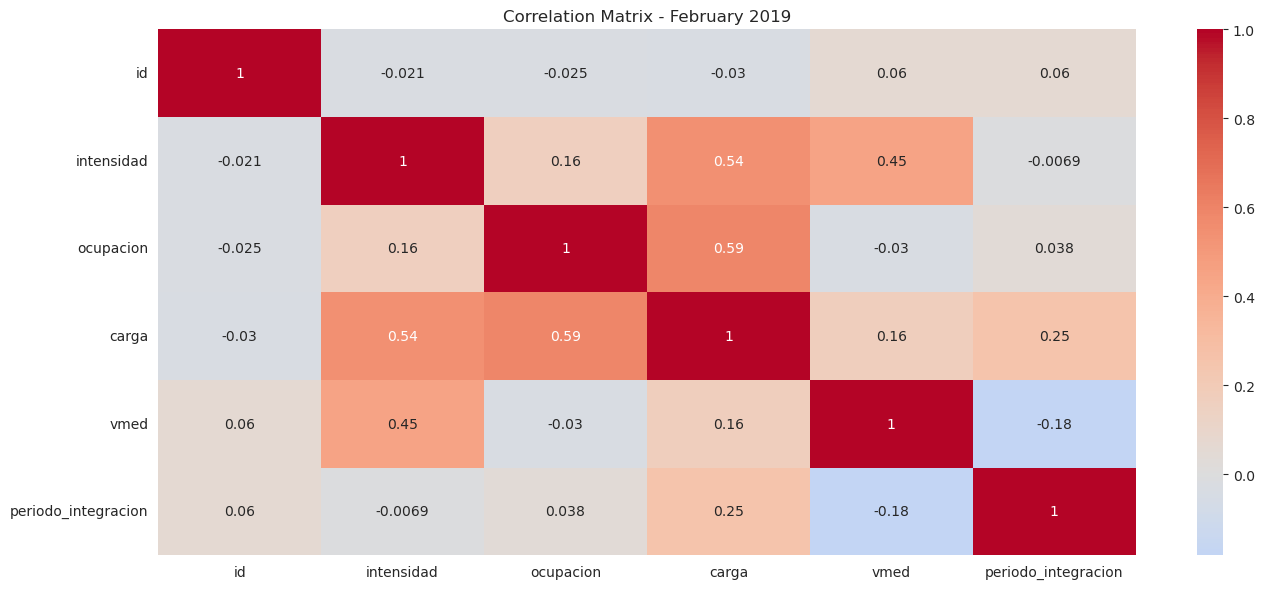

In [12]:
sns.heatmap(df_feb2019.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - February 2019')
plt.tight_layout()
plt.show()

In [10]:
df_feb2019.corr()

ValueError: could not convert string to float: '2019-02-01 00:00:00'